# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Winardi]
- **Email:** [awinardi1004@gmail.com]
- **ID Dicoding:** [winardi_FuKo]

## Menentukan Pertanyaan Bisnis

- Product Apa saja yang terlaris di E-commerce ?
- Kota mana cutomer paling banyak tinggal ?


## Import Semua Packages/Library yang Digunakan

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Data Wrangling

### Gathering Data

In [439]:
customers_df = pd.read_csv("E-commerce/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [440]:
orders_df=pd.read_csv("E-commerce/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [441]:
order_items_df = pd.read_csv("E-commerce/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [442]:
products_df = pd.read_csv("E-commerce/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [443]:
sellers_df = pd.read_csv("E-commerce/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [444]:
category_name_df = pd.read_csv("E-commerce/product_category_name_translation.csv")
category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Kita hanya menggunakan beberapa tabel saja untuk dianalysisis yaitu tabel `customers_df` untuk mengetahu distibusi geografi dari customers, tabel `orders_df` untuk mengetahui lama waktu dyang diperlukan pesanan diproses, `order_items_df` untuk mengetahui product apa saja yang dipesan dalam suatu pesanan, `products_df` untuk mengetahui informasi detail dari product yang dipesanan, `sellers_df` untuk mengetahui distibusi geografi seller, dan `category_name_df` untuk mengganti category_product dari bahasa portugis menjadi english agar lebih mudah dimengerti.

### Assessing Data

##### Check `customers_df`

In [445]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [446]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [447]:
customers_df.duplicated().sum()

0

**Insight:**
- Pada tabel `customers_df` tidak adanya data yang hilang atau missing value, tidak terdapt nilai duplicat, dan semua type data sesuai.
- Karena tidak adanya data yang perlu diperbaiki pada tabel `customers_df` maka proses data cleaning untuk `customers_df` tidak dilakukan dan lanjut pada peoses EDA

##### Check `orders_df`

In [448]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [449]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [450]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [451]:
orders_df.duplicated().sum()

0

**Insight:**
- Terdapat kesalahan type data dari beberapa kolom proses jadi kita akan merubahnya menja bertype data datetime.
- Terdapat nilai yang kosong di pad kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`.
- Kolom-kolom yang kosong merupaka kolom suatu proses jadi akan kita isis denga nilai kolom proses sebelumnya, selain itu kita pastikan suatu proses nilainya tidak ada yang mendahului jadi kolom-kolom proses ini akan diubah sama dengan waktu kolom proses sebelumnya jika kolom proses yang terbaru waktunya mendahului kolom proses sebelumya.

##### check `order_items_df`

In [452]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [453]:
order_items_df.duplicated().sum()

0

In [454]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [455]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Tidak terdapat nilai yang kosong dan tidak adanya duplikasi pada tabel ini. akan tetapi terdapt kesalahan type data pada kolom `shipping_limit_date`.
- Kita akan merubah type data kolom `shipping_limit_date` menjadi type datetime.

##### check `products_df`

In [456]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [457]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [458]:
products_df.duplicated().sum()

0

In [459]:
def is_unique_column(products_df, column_name):
    return products_df['product_id'].nunique() == len(products_df)
    
print("Apakah 'order_id' unik?", is_unique_column(products_df, 'order_id'))

Apakah 'order_id' unik? True


In [460]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Terdapat beberapi nilai hilang jadi kita akan mengisi nilaikosong dengan mode pada kolom `product_category_name` dan median pada kolom lainya.

##### Check ``sellers_df`

In [461]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [462]:
sellers_df.duplicated().sum()

0

In [463]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- Tidak ada nilai yang kosong pada tabel `sellers_df`.
- Tidak terjadi duplicat pada tabel `sellers_df`.
- type data sudah sesuai

##### check `category_name_df`

In [464]:
category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [465]:
category_name_df.duplicated().sum()

0

In [466]:
# Mengecek nilai unique pada setiap kolom
def is_column_unique(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Kolom '{column_name}' tidak ditemukan di DataFrame.")
    return df[column_name].is_unique

# Check column product_category_name
column_name = "product_category_name" 
if is_column_unique(category_name_df, column_name):
    print(f"Kolom '{column_name}' memiliki nilai unik.")
else:
    print(f"Kolom '{column_name}' tidak memiliki nilai unik.")

# checj column product_category_name_english
column_name = "product_category_name_english" 
if is_column_unique(category_name_df, column_name):
    print(f"Kolom '{column_name}' memiliki nilai unik.")
else:
    print(f"Kolom '{column_name}' tidak memiliki nilai unik.")

Kolom 'product_category_name' memiliki nilai unik.
Kolom 'product_category_name_english' memiliki nilai unik.


**Insight:**
- Tidak ada data yang hilang atau kosong pada category_name.
- tidak terdapat duplikasi pada tabel category_name.
- Pada setiap column nilainya bersifat unik jadi kita dapat mengganti column product_category_name pada tabel products_df dengan product_category_name_english agar lebih mudah dimengerti.

### Cleaning Data

##### Cleaning `orders_df`

In [467]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [468]:
o_columns = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
orders_df[o_columns] = orders_df[o_columns].apply(pd.to_datetime)

In [469]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [470]:
# Menigisi nilai kosong kolom tanggal berdasarkan urutan logis dari proses
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'], inplace=True)
orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_carrier_date'], inplace=True)

In [471]:
orders_df['order_approved_at'] = orders_df.apply(lambda row: row['order_purchase_timestamp'] if row['order_purchase_timestamp'] > row['order_approved_at'] else row['order_approved_at'], axis=1)
orders_df['order_delivered_carrier_date'] = orders_df.apply(lambda row: row['order_approved_at'] if row['order_approved_at'] > row['order_delivered_carrier_date'] else row['order_delivered_carrier_date'], axis=1)
orders_df['order_delivered_customer_date'] = orders_df.apply(lambda row: row['order_delivered_carrier_date'] if row['order_delivered_carrier_date'] > row['order_delivered_customer_date'] else row['order_delivered_customer_date'], axis=1)

In [472]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**
- proses yang dilakukan yaitu merubah type data menjadi datetime pada beberapa kolom agar sesuai.
- mengisis kolom-kolom kosong dengan nilai kolom pada kolom proses pengiriman sebelumnya.
- merubah nilai kolom yang tidak seusai. pada proses ini kita membuat nili kolom sama dengan nilai kolom proses sebelumnya jika kolom proses yang terbaru berisi tanggal yang lebih lama dibanding kolom proses sebelumnya. 

##### Cleaning `order_items_df`

In [473]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [474]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Mengubah tyoe data menjadi datetime pada kolom shipping_limit_date

##### Cleaning `products_df`

In [475]:
# merge products_df dengan category_name_df untuk mengubah colomn product_category_name dengan English
products_df =  products_df.merge(category_name_df, on='product_category_name', how='inner')

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32328 non-null  object 
 1   product_category_name          32328 non-null  object 
 2   product_name_lenght            32328 non-null  float64
 3   product_description_lenght     32328 non-null  float64
 4   product_photos_qty             32328 non-null  float64
 5   product_weight_g               32327 non-null  float64
 6   product_length_cm              32327 non-null  float64
 7   product_height_cm              32327 non-null  float64
 8   product_width_cm               32327 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [476]:
# drop column product_category_name
products_df = products_df.drop(columns=["product_category_name"])

In [477]:
# ubah Nama column
products_df = products_df.rename(columns={"product_category_name_english" : "product_category_name"})

In [478]:
mode_pcm = products_df['product_category_name'].mode()[0]
products_df['product_category_name'].fillna(mode_pcm, inplace=True)
med_columns_fill = ['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']
for col in med_columns_fill:
    median_value = products_df[col].median()
    products_df[col].fillna(median_value, inplace=True)

In [479]:
products_df.isna().sum()

product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_category_name         0
dtype: int64

**Insight:**
- Mengisi kolom product_category_name dengan nilai yang sering muncul atau mode kerana bertipe string atau object
- sedangkan pad kolom kolom lainya bertipe float kita mengisinya dengan nilai tengah atau median.

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [480]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [481]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- Cutomer terbanyak berasal atau tinggal di sao paulo, rio de janeiro, dan belo horizonte.

### Explore `orders_df`

In [482]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [483]:
orders_df.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: customer_id, dtype: int64

##### Menghitung Perbedaan Waktu (Time Differences)

In [484]:
# Durasi dari purchase hingga approval
orders_df['time_to_approve'] = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
# Durasi dari approval hingga pengiriman ke carrier
orders_df['time_to_carrier'] = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
# Durasi dari carrier hingga diterima oleh customer
orders_df['time_to_delivery'] = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']

orders_df[['time_to_approve', 'time_to_carrier', 'time_to_delivery']].describe()

,time_to_approve,time_to_carrier,time_to_delivery
count,99441,99441,99441
mean,0 days 10:24:08.388139700,2 days 18:27:31.188202049,9 days 00:58:23.982160275
std,1 days 02:01:13.435390314,3 days 11:29:32.433405256,8 days 18:14:17.555724396
min,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,0 days 00:12:53,0 days 20:12:47,3 days 21:04:41
50%,0 days 00:20:33,1 days 18:36:47,7 days 00:23:27
75%,0 days 14:32:16,3 days 12:37:59,11 days 21:11:25
max,187 days 21:10:50,125 days 18:18:06,205 days 04:35:00


##### Menganalisis Distribusi Waktu Pemesanan

In [485]:
# Menambahkan kolom hari, minggu, atau bulan
orders_df['purchase_day'] = orders_df['order_purchase_timestamp'].dt.day_name()
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.month

# Menghitung jumlah pesanan berdasarkan hari
purchase_day_counts = orders_df.groupby('purchase_day')['order_id'].count()
# Menghitung jumlah pesanan berdasarkan bulan
purchase_month_counts = orders_df.groupby('purchase_month')['order_id'].count()

In [486]:
purchase_day_counts.sort_values(ascending=False)

purchase_day
Monday       16196
Tuesday      15963
Wednesday    15552
Thursday     14761
Friday       14122
Sunday       11960
Saturday     10887
Name: order_id, dtype: int64

In [487]:
purchase_month_counts.sort_values(ascending=False)

purchase_month
8     10843
5     10573
7     10318
3      9893
6      9412
4      9343
2      8508
1      8069
11     7544
12     5674
10     4959
9      4305
Name: order_id, dtype: int64

**Insight:**
- Order_status terbanyak adalah delivered. untuk proses yang lain munkin akan berubah seiring bertambahnya waktu kecuali status canceled.
- rata-rata waktu yang diperlukan dari proses order_purchase_timestamp ke order_approved_at adalah 10 jam, rata-rata waktu yang diperlukan dari proses order_approved_at ke order_delivered_carrier_date  adalah  hari 18 jam. sedangkan rata-rata waktu yang diperlukan dari proses order_delevered_acarrier_date ke order_delivered_customer_date adalah 9 hari.
- Pemesanan terbanyak dilakukan padahari Senin, sedangan pemesanan terbanyak dilakukan pada bulan agustus.

x

### Explore `order_items_df`

In [488]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### 1. Order Analysis

In [489]:
# Jumlah pesanan unik
unique_orders = order_items_df['order_id'].nunique()
unique_orders

98666

##### 2. Product Analysis

In [490]:
# Produk paling populer
popular_products = order_items_df['product_id'].value_counts()
popular_products

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: count, Length: 32951, dtype: int64

In [491]:
# Analisis harga rata-rata per produk
avg_price_per_product = order_items_df.groupby('product_id')['price'].mean()
avg_price_per_product.sort_values(ascending=False)

product_id
489ae2aa008f021502940f251d4cce7f    6735.00
69c590f7ffc7bf8db97190b6cb6ed62e    6729.00
1bdf5e6731585cf01aa8169c7028d6ad    6499.00
a6492cc69376c469ab6f61d8f44de961    4799.00
c3ed642d592594bb648ff4a04cee2747    4690.00
                                     ...   
310dc32058903b6416c71faff132df9e       2.29
46fce52cef5caa7cc225a5531c946c8b       2.20
270516a3f41dc035aa87d220228f844c       1.20
05b515fdc76e888aada3c6d66c201dff       1.20
8a3254bee785a526d548a81a9bc3c9be       0.85
Name: price, Length: 32951, dtype: float64

In [492]:
avg_price_per_product.describe()

count    32951.000000
mean       145.302464
std        246.895756
min          0.850000
25%         39.900000
50%         79.000000
75%        154.900000
max       6735.000000
Name: price, dtype: float64

##### 3. Seller Analysis

In [493]:
# Penjual paling aktif berdasarkan jumlah pesanan
active_sellers = order_items_df.groupby('seller_id')['order_id'].nunique()
active_sellers.sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
                                    ... 
ceb7b4fb9401cd378de7886317ad1b47       1
cecd97bc34ed8330bd4cd15713eda670       1
5b92bfa4120daa27c574daa2e386c693       1
5aaa890629f83706d8d9bfecd8377c1c       1
7d81e74a4755b552267cd5e081563028       1
Name: order_id, Length: 3095, dtype: int64

**Insight:**
- Jumlah seluruh Pesanan adalah 98666.
- Product terbanyak yang terjual adalah dengan ID : aca2eb7d00ea1a7b8ebd4e68314663af sebanyak 527.
- Harga produk termahal adalah 6735.00 BRL, dan harga produk termurah adalah 0.85 BRL.
- Penjual dengan pesanan terbanyak adalah penjual dengan ID : 6560211a19b47992c3666cc44a7e94c0.

x

### Eksplore `products_df`

##### Analisis Produk Berdasarkan Kategori

In [494]:
# Distribusi kategori produk
category_distribution = products_df['product_category_name'].value_counts()
print("Distribusi kategori produk:\n", category_distribution)

Distribusi kategori produk:
 product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 71, dtype: int64


##### Analisis Jumlah Foto Produk

In [495]:
# Statistik deskriptif untuk jumlah foto
photo_qty_stats = products_df['product_photos_qty'].describe()
print("Statistik jumlah foto per produk:\n", photo_qty_stats)

Statistik jumlah foto per produk:
 count    32328.000000
mean         2.188815
std          1.736746
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         20.000000
Name: product_photos_qty, dtype: float64


##### Analisis Panjang Nama dan Deskripsi Produk

In [496]:
# Statistik deskriptif untuk panjang nama dan deskripsi
name_length_stats = products_df['product_name_lenght'].describe()
description_length_stats = products_df['product_description_lenght'].describe()

print("Statistik panjang nama produk:\n", name_length_stats)
print("\nStatistik panjang deskripsi produk:\n", description_length_stats)

Statistik panjang nama produk:
 count    32328.000000
mean        48.474078
std         10.246388
min          5.000000
25%         42.000000
50%         51.000000
75%         57.000000
max         76.000000
Name: product_name_lenght, dtype: float64

Statistik panjang deskripsi produk:
 count    32328.000000
mean       771.520168
std        635.180062
min          4.000000
25%        339.000000
50%        595.000000
75%        972.000000
max       3992.000000
Name: product_description_lenght, dtype: float64


##### Analisis Dimensi dan Berat Produk

In [497]:
# Statistik deskriptif untuk berat produk
weight_stats = products_df['product_weight_g'].describe()
print("Statistik berat produk (gram):\n", weight_stats)

# Statistik deskriptif untuk dimensi produk
dimension_stats = products_df[['product_length_cm', 'product_height_cm', 'product_width_cm']].describe()
print("\nStatistik dimensi produk (cm):\n", dimension_stats)

# Menghitung volume produk
products_df['product_volume_cm3'] = products_df['product_length_cm'] * products_df['product_height_cm'] * products_df['product_width_cm']
volume_stats = products_df['product_volume_cm3'].describe()
print("\nStatistik volume produk (cm^3):\n", volume_stats)

Statistik berat produk (gram):
 count    32328.000000
mean      2276.912027
std       4279.676855
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

Statistik dimensi produk (cm):
        product_length_cm  product_height_cm  product_width_cm
count       32328.000000       32328.000000      32328.000000
mean           30.856317          16.955828         23.208364
std            16.958228          13.637053         12.080491
min             7.000000           2.000000          6.000000
25%            18.000000           8.000000         15.000000
50%            25.000000          13.000000         20.000000
75%            38.000000          20.250000         30.000000
max           105.000000         105.000000        118.000000

Statistik volume produk (cm^3):
 count     32328.000000
mean      16577.821610
std       27067.460498
min         168.000000
25%        2880.000000
50%        68

##### Analisis Korelasi Dimensi, Berat, dan Volume

In [498]:
# Menghitung korelasi antar variabel dimensi, berat, dan volume
correlation_matrix = products_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_volume_cm3']].corr()
print("\nMatriks korelasi:\n", correlation_matrix)


Matriks korelasi:
                     product_weight_g  product_length_cm  product_height_cm  \
product_weight_g            1.000000           0.476172           0.562670   
product_length_cm           0.476172           1.000000           0.202178   
product_height_cm           0.562670           0.202178           1.000000   
product_width_cm            0.526698           0.541697           0.311562   
product_volume_cm3          0.801934           0.541511           0.711817   

                    product_width_cm  product_volume_cm3  
product_weight_g            0.526698            0.801934  
product_length_cm           0.541697            0.541511  
product_height_cm           0.311562            0.711817  
product_width_cm            1.000000            0.638912  
product_volume_cm3          0.638912            1.000000  


**Insight:**
-  product kategory bed_bath_table merupaka kategory produk yang penjualannya terbanyak, sedangkan cds_dvds_musicals kategory produk dengan penjualan paling sedikit.
-  Rata-rata jumlah karakter  product_name adalah 48 karakter(huruf), sedangkan rata-rata karakter deskripsi produk adalah 771 karakter
-  Jumlah rata-rata foto pada pada produk adalah  2, jumlah maksimal foto pada produk adalah , jumlah paling sedikit foto produk adalah 12.
-  Rata-rata berat produk 2276.91 gram, dengan maksimal berat produk 40425.00 gram dan paling ringann 0.00 gram. berat produk dengan 0.00 gram saya anggap merupakan produk digital
-  volume produk terbesar adalah 296208.00 cm^3. rata-rata volume produk adalah 16577.82 cm^3, dan produk dengan volume terkecil adalah 168.00 cm^3.
korelasi antara berat produk dengan volume adalah 0.801934.

### Eksplore `sellers_df`

In [499]:
sellers_df.groupby(by="seller_city").agg({
    "seller_id": "nunique"
}).sort_values(by="seller_id", ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [500]:
sellers_df.groupby(by="seller_city").agg({
    "seller_id": "nunique"
}).sort_values(by="seller_id", ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


**Insight:**
- Seller terbanyak berlokasi di sao paulo sebanyak 694

### Eksplore `customers_df` & `orders_df`

In [501]:
customer_orders_df = pd.merge(
    left = orders_df,
    right = customers_df,
    left_on = 'customer_id',
    right_on = 'customer_id'
)
customer_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_to_approve,time_to_carrier,time_to_delivery,purchase_day,purchase_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13,Monday,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,12 days 00:56:45,Tuesday,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0 days 04:54:37,9 days 04:16:29,Wednesday,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,Saturday,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,0 days 21:26:05,1 days 22:30:28,Tuesday,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [502]:
customer_orders_df.groupby(by='customer_city').agg({
    'order_id': 'nunique'
}).sort_values(by="order_id", ascending=False)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [503]:
customer_orders_pivot = customer_orders_df.groupby(['customer_city', 'order_status']).size().unstack(fill_value=0)

customer_orders_pivot['total_orders'] = customer_orders_pivot.sum(axis=1)

customer_orders_pivot.sort_values(by="total_orders", ascending=False)

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable,total_orders
customer_city,,,,,,,,,
sao paulo,1,140,0,15045,52,52,141,109,15540
rio de janeiro,0,48,1,6601,14,15,170,33,6882
belo horizonte,0,17,0,2697,7,7,26,19,2773
brasilia,0,7,1,2071,3,7,30,12,2131
curitiba,0,10,0,1489,6,2,5,9,1521
...,...,...,...,...,...,...,...,...,...
ibiara,0,0,0,1,0,0,0,0,1
rio espera,0,0,0,1,0,0,0,0,1
rio dos indios,0,0,0,1,0,0,0,0,1


In [504]:
grouped_df = customer_orders_df.groupby(['customer_city', 'purchase_month'])['order_id'].nunique().unstack(fill_value=0)

grouped_df['total_orders'] = grouped_df.sum(axis=1)

grouped_df.sort_values(by='total_orders', ascending=False)

purchase_month,1,2,3,4,5,6,7,8,9,10,11,12,total_orders
customer_city,,,,,,,,,,,,,
sao paulo,1195,1272,1533,1467,1743,1532,1625,1954,601,660,1118,840,15540
rio de janeiro,545,656,645,595,700,570,714,770,308,395,578,406,6882
belo horizonte,239,218,322,264,275,257,259,298,103,140,219,179,2773
brasilia,151,196,204,183,208,217,241,231,97,104,168,131,2131
curitiba,150,137,142,154,146,145,157,166,49,60,134,81,1521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ibiara,0,0,0,0,0,0,1,0,0,0,0,0,1
rio espera,0,0,1,0,0,0,0,0,0,0,0,0,1
rio dos indios,0,0,0,1,0,0,0,0,0,0,0,0,1


**Insight:**
- Pesanan terbanyak berasal dari kota saopaulo hal tersebut karena banyak customer tinggal di sau paulo


### Eksplore `orders_df`, `order_items_df`, dan `products_df`

In [505]:
merged_df = orders_df.merge(order_items_df, on='order_id', how='inner')
merged_df = merged_df.merge(products_df, on='product_id', how='inner')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_to_approve,time_to_carrier,...,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,...,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1976.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,0 days 01:35:45,1 days 19:23:17,...,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1976.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,0 days 00:18:28,1 days 22:52:28,...,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1976.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1 days 02:47:25,2 days 14:34:35,...,14.10,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1976.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,...,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,4693.0


In [506]:
merged_df.groupby(by="product_category_name").agg({
    "product_id": "count",  
    "order_id": "nunique",
    "customer_id" : "nunique",
    "price" : "sum"
}).rename(columns={
    "product_id": "total_units", 
    "order_id": "total_order"  ,
    "customer_id": "unique_customers_count",
    "price" : "total_revenu"
}).sort_values(by="total_units", ascending=False)

,total_units,total_order,unique_customers_count,total_revenu
product_category_name,,,,
bed_bath_table,11115,9417,9417,1036988.68
health_beauty,9670,8836,8836,1258681.34
sports_leisure,8641,7720,7720,988048.97
furniture_decor,8334,6449,6449,729762.49
computers_accessories,7827,6689,6689,911954.32
...,...,...,...,...
arts_and_craftmanship,24,23,23,1814.01
la_cuisine,14,13,13,2054.99
cds_dvds_musicals,14,12,12,730.00


**Insight:**
- dari pivot diatas dapat diketahui produk_category dengan revenue tertinggi adalah bed_bath_table sebanyak 1036988.68 BRL.

### Join All table

In [507]:
all_df = merged_df.merge(customers_df, on='customer_id', how='inner')
all_df = all_df.merge(sellers_df, on="seller_id", how='inner')

In [508]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       111023 non-null  object         
 1   customer_id                    111023 non-null  object         
 2   order_status                   111023 non-null  object         
 3   order_purchase_timestamp       111023 non-null  datetime64[ns] 
 4   order_approved_at              111023 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   111023 non-null  datetime64[ns] 
 6   order_delivered_customer_date  111023 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  111023 non-null  datetime64[ns] 
 8   time_to_approve                111023 non-null  timedelta64[ns]
 9   time_to_carrier                111023 non-null  timedelta64[ns]
 10  time_to_delivery               111023 non-null  timedelt

## Visualization & Explanatory Analysis

### Pertanyaan 1:  How has the company's sales and revenue performed in the last few months?

In [509]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.tail()

,order_purchase_timestamp,order_count,revenue
20,2018-05,6817,991422.74
21,2018-06,6139,862737.18
22,2018-07,6226,890046.19
23,2018-08,6418,850209.79
24,2018-09,1,145.00


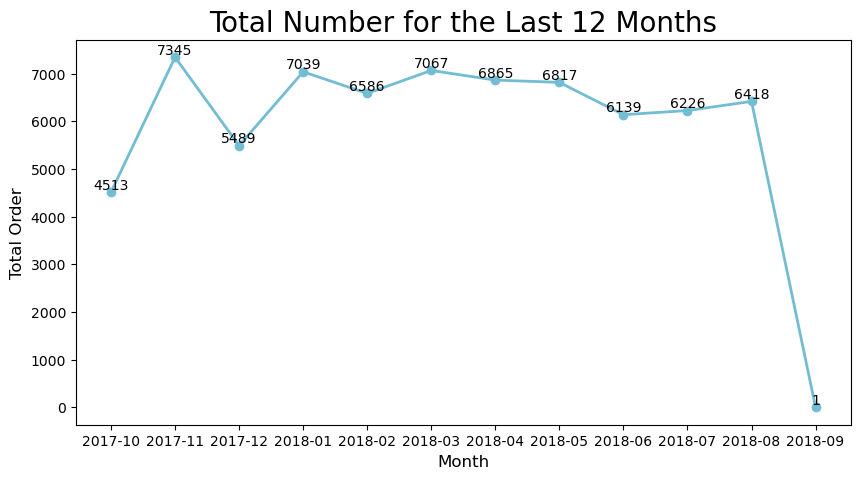

In [533]:
last_year = monthly_orders_df.tail(12)

plt.figure(figsize=(10, 5))  
plt.plot(
    last_year["order_purchase_timestamp"],
    last_year["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)

for x, y in zip(last_year["order_purchase_timestamp"], last_year["order_count"]):
    plt.text(
        x, y, f'{y}', fontsize=10, color="black", ha='center', va='bottom'
    )


plt.title("Total Number for the Last 12 Months", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Order", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

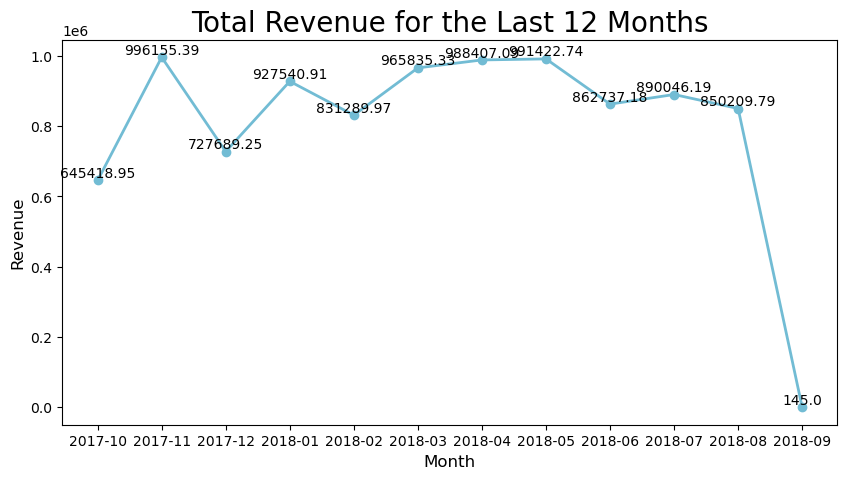

In [534]:
last_year = monthly_orders_df.tail(12)

plt.figure(figsize=(10, 5))  
plt.plot(
    last_year["order_purchase_timestamp"],
    last_year["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)

for x, y in zip(last_year["order_purchase_timestamp"], last_year["revenue"]):
    plt.text(
        x, y, f'{y}', fontsize=10, color="black", ha='center', va='bottom'
    )


plt.title("Total Revenue for the Last 12 Months", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight :**
- Jumlah pesanan dan revenue terbanyak terjadi pada Bulan November 2017.

### Pertanyaan 2: Which products category sell the most and least?

In [512]:
# Menghitung jumlah item per kategori produk
sum_order_items_df = (
    all_df.groupby("product_category_name")
    .size()
    .reset_index(name="total_quantity")
    .sort_values(by="total_quantity", ascending=False)
)

sum_order_items_df.head(15)

,product_category_name,total_quantity
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
70,watches_gifts,5991
68,telephony,4545
42,garden_tools,4347
5,auto,4235


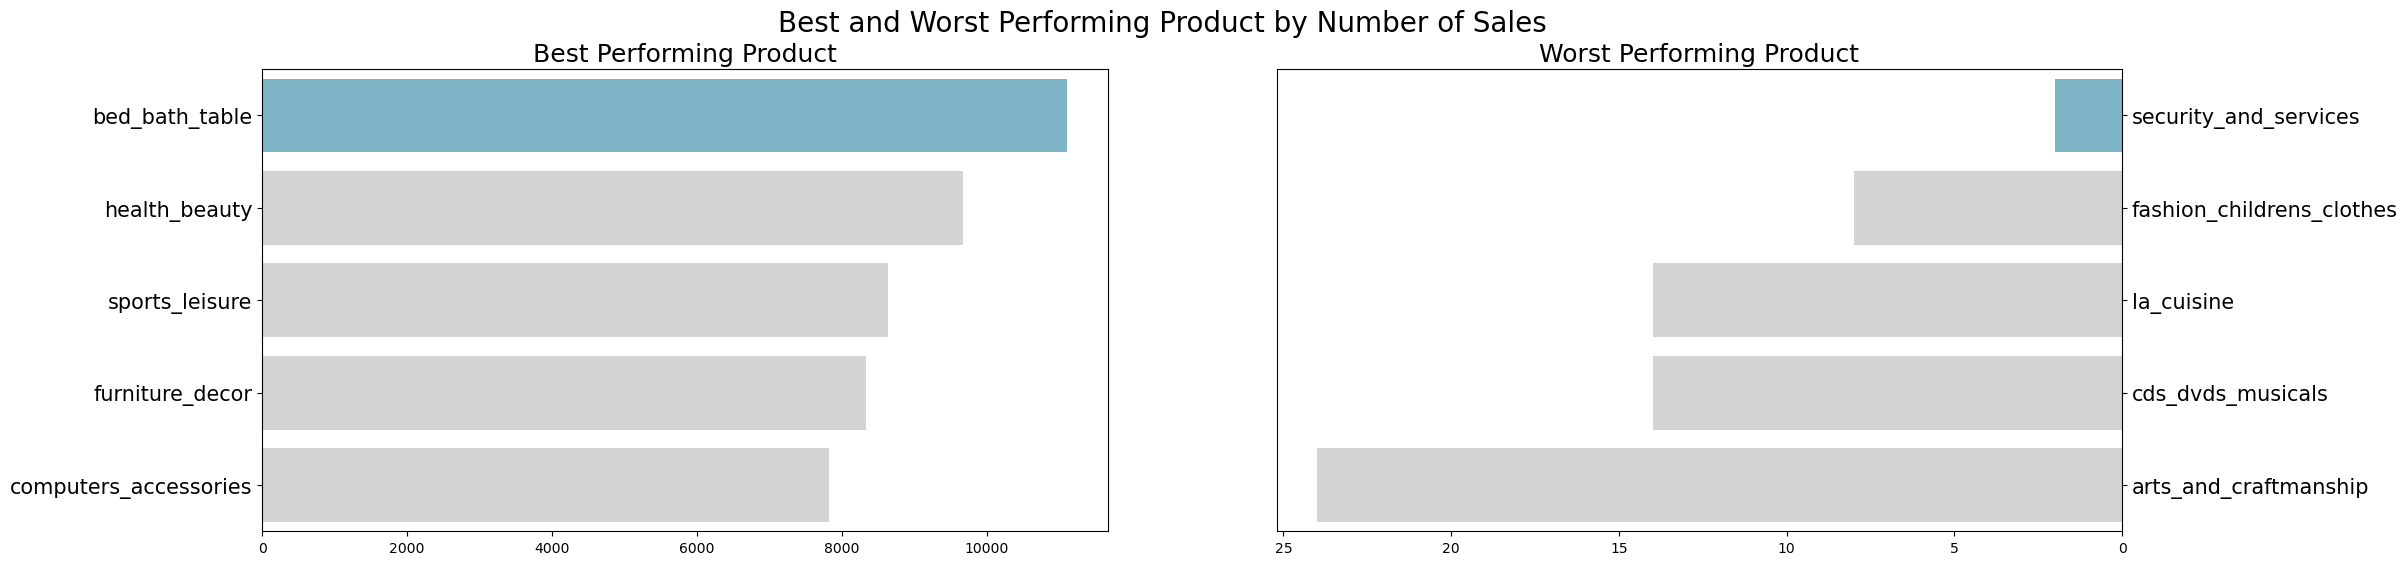

In [513]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_quantity", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="total_quantity", y="product_category_name", data=sum_order_items_df.sort_values(by="total_quantity", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

**Insight:**
- 5 Produk kategory dengan jumlah penjualan terbanyak adalah bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computers_accessories.
- 5 produk kategory dengan jumlah penjualan paling sedkit adalah security_and_services, fashion_childerens_clothes, la_cuisene, cds_dvds_musicals, dan arts_and_craftmanship.

### Pertanyaan 3: What is the geographic distribution of Customers by City?

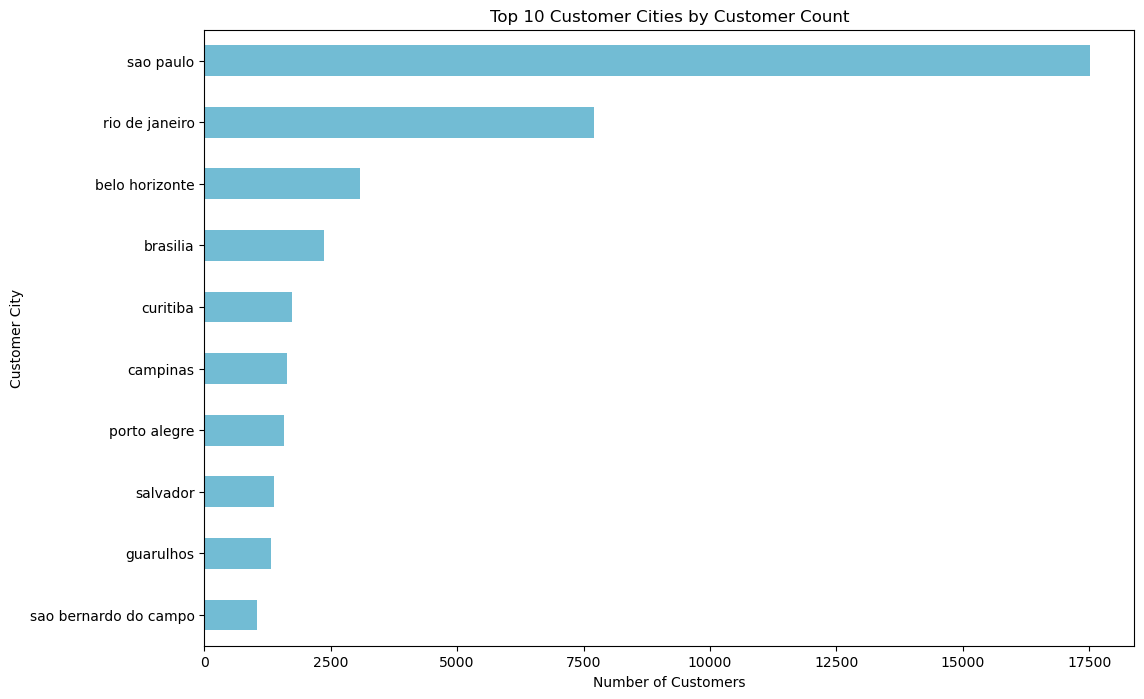

In [514]:
top_cities = all_df['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_cities.plot(kind='barh', color="#72BCD4")
plt.title("Top 10 Customer Cities by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("Customer City")
plt.gca().invert_yaxis()
plt.show()

**Insight:**
- Customer paling banyak tingal di kota sao paulo

### Pertanyaan 4: What is the geographic distribution of sellers by city?

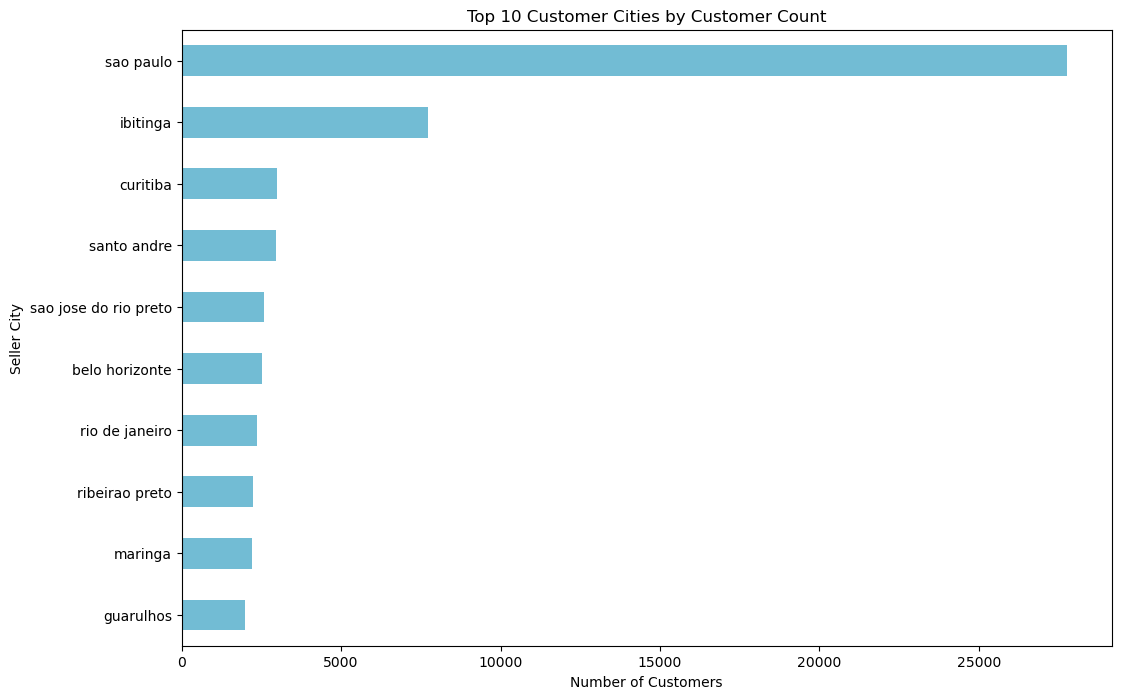

In [515]:
top_seller_cities = all_df['seller_city'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_seller_cities.plot(kind='barh', color="#72BCD4")
plt.title("Top 10 Customer Cities by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("Seller City")
plt.gca().invert_yaxis()  # Membuat kota dengan jumlah tertinggi di atas
plt.show()

**Insight:**
- Seller terbanyak berasal dari kota sao paulo

### Pertanyaan 5: What is the number of orders by order status?

In [516]:
order_status = all_df.groupby(by='order_status').agg({
    'order_id' : 'nunique'
}).rename(columns={
    'order_id': 'total_order'}).sort_values(by='total_order', ascending=False)

order_status

,total_order
order_status,
delivered,95127
shipped,1082
canceled,445
invoiced,305
processing,289
unavailable,6
approved,2


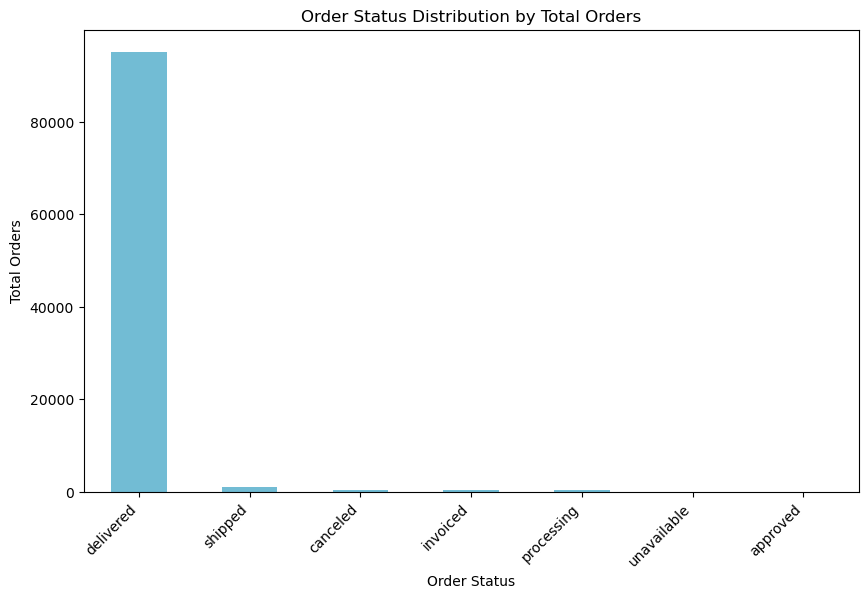

In [517]:
plt.figure(figsize=(10, 6))
order_status['total_order'].plot(kind='bar', color="#72BCD4")

plt.title("Order Status Distribution by Total Orders")
plt.xlabel("Order Status")
plt.ylabel("Total Orders")
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight:**
- Satus peniriman paling bayak adalah delivered hal tersebut baik karena banyak pengiriman yang berhasil dikirim

### Pertanyaan 6: How much is the freight value by order status?

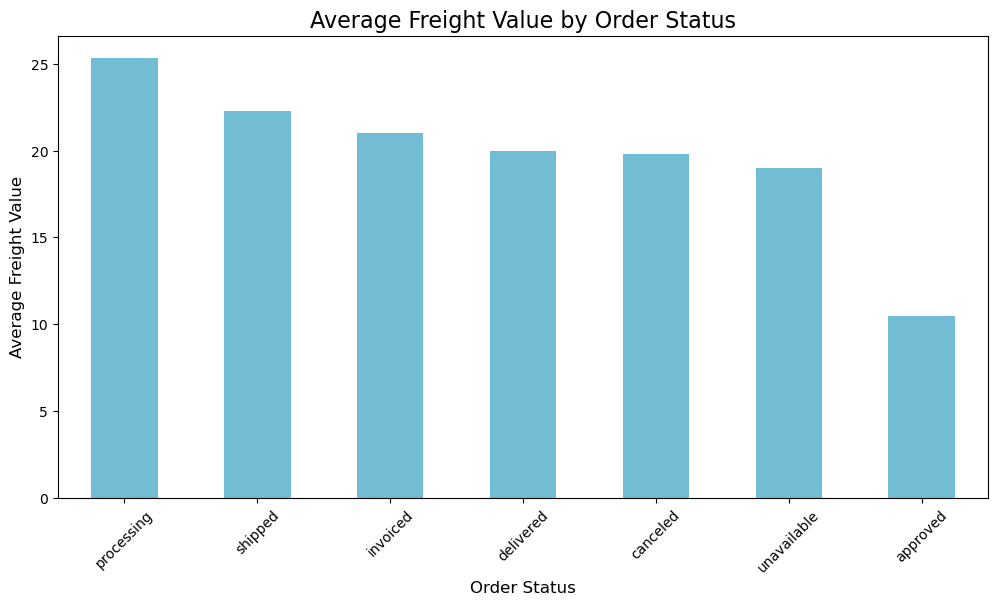

In [518]:
# Menghitung rata-rata freight_value per order_status
avg_freight_value = all_df.groupby('order_status')['freight_value'].mean().sort_values(ascending=False)

# Membuat bar plot
plt.figure(figsize=(12, 6))
avg_freight_value.plot(kind='bar', color="#72BCD4")

# Menambahkan judul dan label
plt.title("Average Freight Value by Order Status", fontsize=16)
plt.xlabel("Order Status", fontsize=12)
plt.ylabel("Average Freight Value", fontsize=12)

# Menampilkan plot
plt.xticks(rotation=45)  # Menambahkan rotasi untuk label sumbu x jika labelnya panjang
plt.show()

**Insight:**
- Dari biaya pengiriman antara delivered dengan canceled terlihat tidak begitu berbeda hal tersebut blm bisa diambil kesimpulan biaya pengiriman menjadi penyebab pesanan cenceled

### Pertanyaan 7: What is the delivery time difference by order status?

In [519]:
# Menghitung perbedaan waktu antara order_purchase_timestamp dan order_estimated_delivery_date
all_df['estimated_delivery_time_diff'] = (all_df['order_estimated_delivery_date'] - all_df['order_purchase_timestamp']).dt.days

# Menampilkan beberapa data awal untuk melihat hasilnya
all_df[['order_purchase_timestamp', 'order_estimated_delivery_date', 'estimated_delivery_time_diff']].head()

,order_purchase_timestamp,order_estimated_delivery_date,estimated_delivery_time_diff
0,2017-10-02 10:56:33,2017-10-18,15
1,2017-08-15 18:29:31,2017-08-28,12
2,2017-08-02 18:24:47,2017-08-15,12
3,2017-10-23 23:26:46,2017-11-13,20
4,2017-08-10 13:35:55,2017-08-23,12


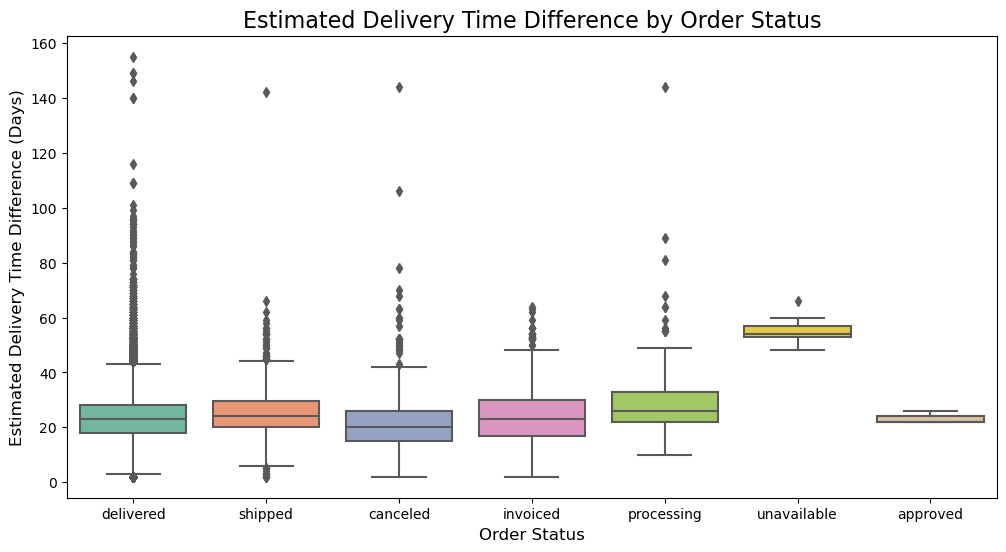

In [520]:
# Membuat box plot untuk melihat hubungan antara estimated_delivery_time_diff dan order_status
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_status', y='estimated_delivery_time_diff', data=all_df, palette="Set2")

# Menambahkan judul dan label
plt.title("Estimated Delivery Time Difference by Order Status", fontsize=16)
plt.xlabel("Order Status", fontsize=12)
plt.ylabel("Estimated Delivery Time Difference (Days)", fontsize=12)

# Menampilkan plot
plt.show()

**Insight:**
- Dari faktor keterlambatan anatara delevered dengan cenceled sekilas terlihat sama jadi keterlambatan juga bukan penyebab suatu pesanan canceled

## Analisis Lanjutan (Opsional)

###  Market Basket Analysis 

In [521]:
basket = pd.pivot_table(all_df, index='order_id', columns='product_category_name', values='product_id', aggfunc='nunique', fill_value=0)
basket

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [522]:
# Encode DataFrame basket dengan nilai True untuk semua nilai diatas 0 dan False untuk semua nilai 
def encode(x):
    if x==0:
        return False
    if x>0:
        return True

basket_encode = basket.applymap(encode)
basket_encode

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00018f77f2f0320c557190d7a144bdd3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
000229ec398224ef6ca0657da4fc703e,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00024acbcdf0a6daa1e931b038114c75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00042b26cf59d7ce69dfabb4e55b4fd9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fffcd46ef2263f404302a634eb57f7eb,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fffce4705a9662cd70adb13d4a31832d,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [523]:
# Ambil transaksi dengan banyaknya produk unik lebih dari 1 saja
basket_filter = basket_encode[(basket_encode>0).sum(axis=1)>1]
basket_filter

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
002f98c0f7efd42638ed6100ca699b42,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
005d9a5423d47281ac463a968b3936fb,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
014405982914c2cde2796ddcf0b8703d,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
01b1a7fdae9ad1837d6ab861705a1fa5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
01cce1175ac3c4a450e3a0f856d02734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe64170e936bc5f6a6a41def260984b9,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
fe678293ea3bb6607a15b2e320e91722,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
ff00a56fe9475a175cd651d77c707a09,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [524]:
# Buat list frequent itemset (kumpulan produk yang sering dibeli)
frequent_itemset = apriori(basket_filter, min_support=.01, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemset['product_cnt'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset

,support,itemsets,product_cnt
0,0.279614,(furniture_decor),1
1,0.272727,(bed_bath_table),1
2,0.140496,(housewares),1
3,0.128099,(baby),1
4,0.100551,(garden_tools),1
5,0.096419,"(bed_bath_table, furniture_decor)",2
6,0.096419,(health_beauty),1
7,0.092287,(sports_leisure),1
8,0.089532,(cool_stuff),1
9,0.070248,(computers_accessories),1


In [525]:
# Hitung nilai support, confidence, dan lift dari setiap pasangan produk yang mungkin
product_association = association_rules(frequent_itemset, metric='confidence', min_threshold=.7).sort_values(['support','confidence'], ascending=[False,False]).reset_index(drop=True)
product_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(home_confort),(bed_bath_table),0.068871,0.272727,0.059229,0.86,3.153333,0.040446,5.194805,0.733384


### Product Performance Analysis

In [526]:
# 1. Hitung jumlah penjualan (jumlah produk yang dipesan)
sales_count = all_df.groupby('product_id')['order_item_id'].count().reset_index(name='sales_count')

# Gabungkan sales_count dengan data produk
df = pd.merge(all_df, sales_count, on='product_id', how='left')

In [527]:
# 2. Analisis Korelasi antara panjang deskripsi produk, panjang nama, jumlah foto, dan jumlah penjualan
correlation_matrix = df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'sales_count']].corr()

In [528]:
# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

Matriks Korelasi:
                            product_name_lenght  product_description_lenght  \
product_name_lenght                    1.000000                    0.091510   
product_description_lenght             0.091510                    1.000000   
product_photos_qty                     0.145833                    0.118019   
sales_count                            0.057468                   -0.032820   

                            product_photos_qty  sales_count  
product_name_lenght                   0.145833     0.057468  
product_description_lenght            0.118019    -0.032820  
product_photos_qty                    1.000000     0.016025  
sales_count                           0.016025     1.000000  


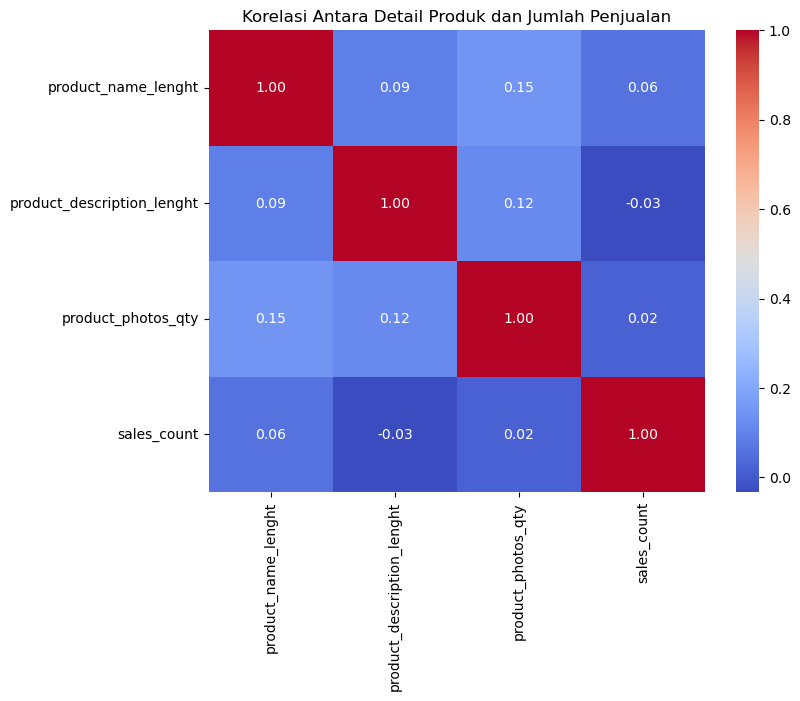

In [529]:
# 3. Visualisasi Korelasi (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antara Detail Produk dan Jumlah Penjualan')
plt.show()

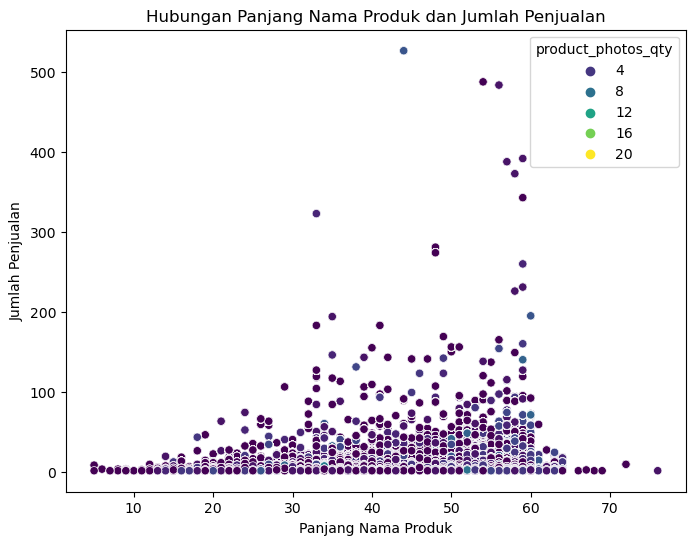

In [530]:
# 4. Visualisasi hubungan panjang nama produk dan jumlah penjualan
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='product_name_lenght', y='sales_count', hue='product_photos_qty', palette='viridis')
plt.title('Hubungan Panjang Nama Produk dan Jumlah Penjualan')
plt.xlabel('Panjang Nama Produk')
plt.ylabel('Jumlah Penjualan')
plt.show()

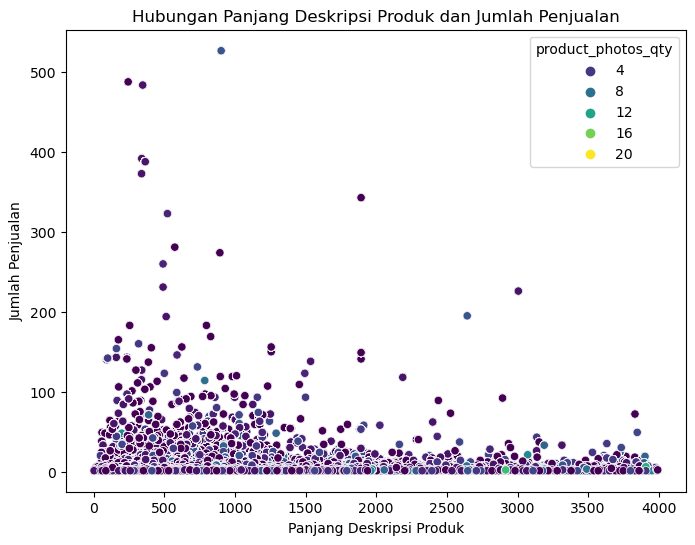

In [531]:
# 5. Visualisasi hubungan panjang deskripsi produk dan jumlah penjualan
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='product_description_lenght', y='sales_count', hue='product_photos_qty', palette='viridis')
plt.title('Hubungan Panjang Deskripsi Produk dan Jumlah Penjualan')
plt.xlabel('Panjang Deskripsi Produk')
plt.ylabel('Jumlah Penjualan')
plt.show()

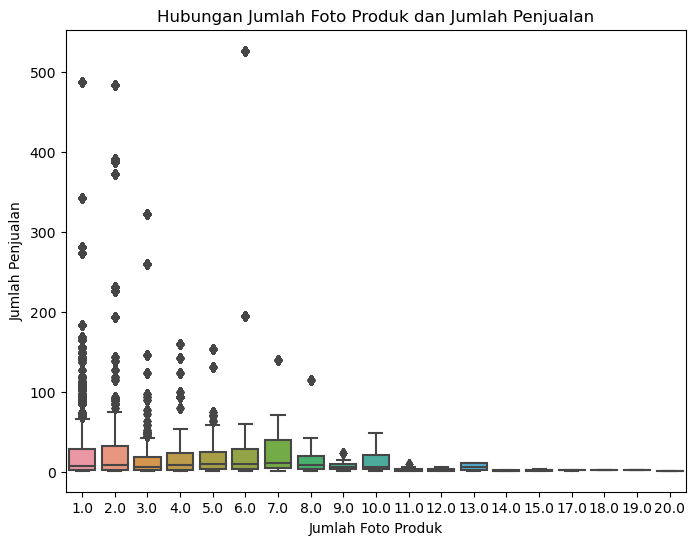

In [532]:
# 6. Visualisasi hubungan jumlah foto produk dan jumlah penjualan
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='product_photos_qty', y='sales_count')
plt.title('Hubungan Jumlah Foto Produk dan Jumlah Penjualan')
plt.xlabel('Jumlah Foto Produk')
plt.ylabel('Jumlah Penjualan')
plt.show()

## Conclusion

- produk yang terlaris di E-commerce merupakn produk dengan kategory bed_bath_table.
- Customer terbanyak berasal atau tinggal di Sao Paulo